### Vizualize Loss

In [3]:
%matplotlib inline

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("../forward_model/")
import stacklineplot
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from generate_samples import generate_readings_from_x_t

In [9]:
# dir = "~/server/reonconstructed_eegs/"
# dir = "./reonconstructed_eegs/"
# filename = "convVAE-lr1e-4-N256-C44-L1004-A.npy"
# filename = "convVAE-lr1e-5-N256-C44-L1004-C.npy"
# dir = "/Users/DanielLongo 1/server/VAE/"
dir = "../VAE/"
# filename = "test-5-lower_lr.npy"
filename = "test-5-batch_norm.npy"

In [10]:
costs = np.load(dir + filename, allow_pickle=True)

In [11]:
iters = np.arange(costs.shape[0]) * 100

<function matplotlib.pyplot.show(*args, **kw)>

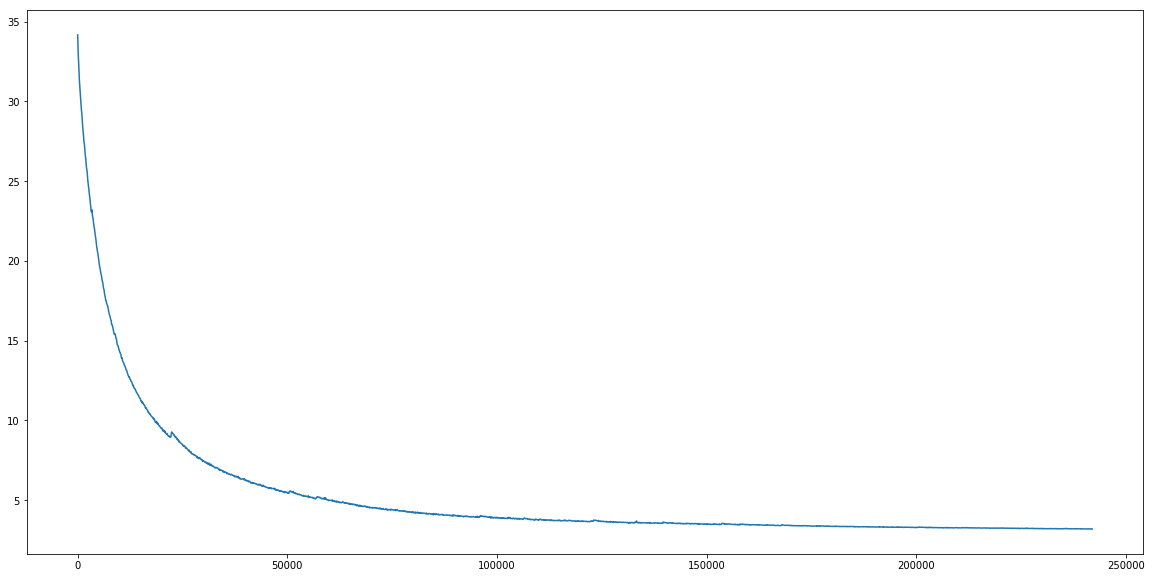

In [12]:
plt.plot(iters, costs)
plt.show

### Generate Samples

In [15]:
# filename = "VAE-test-5-lower_lr"
filename= "VAE-test-6-batch_norm"
num_samples = 4

In [16]:
samples = generate_readings_from_x_t(num_samples, filename, filepath=dir, use_gpu=False)

loading on a CPU
loading samples
type of z <class 'torch.Tensor'>


In [17]:
samples.shape

(4, 768, 44)

In [18]:
samples[3]

array([[ 6.00959659e-02,  1.56646609e-01, -7.05732927e-02, ...,
        -2.68624514e-01, -9.11726058e-02,  2.38120019e-01],
       [-1.05614215e-02,  1.13404654e-01,  1.98873319e-03, ...,
        -2.41548166e-01, -1.38898745e-01,  1.62063614e-01],
       [-2.96339951e-02,  7.39363506e-02, -4.72608767e-03, ...,
        -2.65469223e-01, -9.76980925e-02,  4.39997353e-02],
       ...,
       [-1.21776000e-01,  9.02984813e-02,  4.66934219e-02, ...,
        -2.45829657e-01,  7.32028484e-02,  3.46128009e-02],
       [-6.17638901e-02,  7.90289342e-02,  2.42063943e-02, ...,
        -2.05026343e-01,  1.00413471e-01, -2.54750252e-04],
       [-1.01737022e-01,  6.94276765e-02, -2.82689948e-02, ...,
        -1.39310986e-01,  8.12042356e-02, -1.20745674e-02]], dtype=float32)

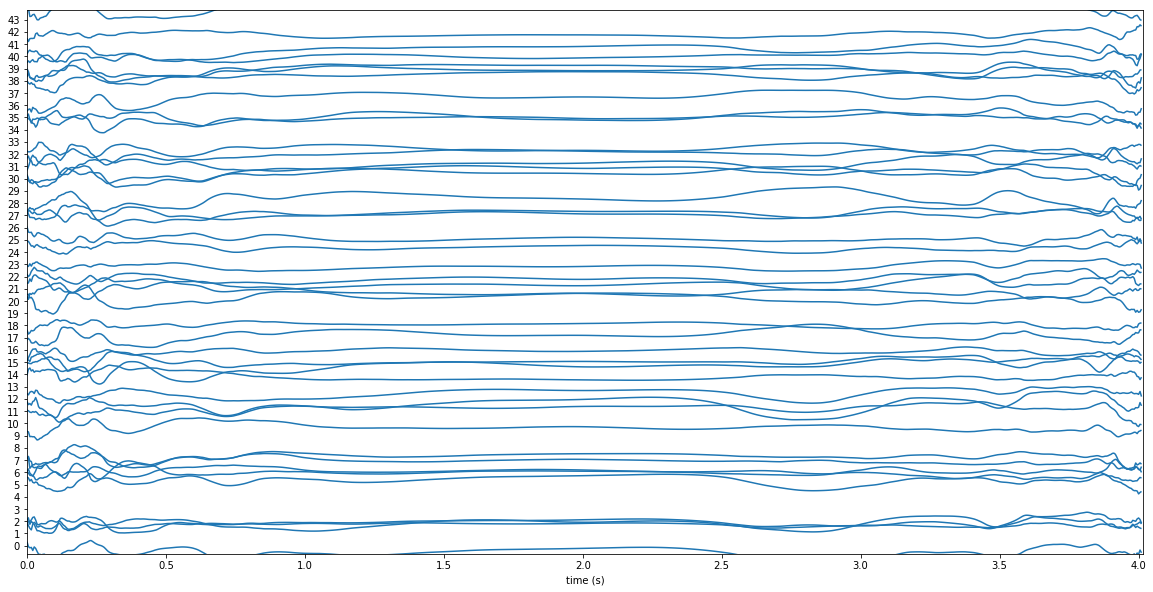

In [20]:
stacklineplot.stackplot(samples[2].T, seconds=1004/250, ylabels=[str(i) for i in range(samples[0].shape[1])], yscale=3)

### Vizualize Reconstructions

In [20]:
prefix = "A"
iter = 1999

In [21]:
# filename_generated = prefix + "-generated-" + str(iter) + ".npy" 
# filename_original = prefix + "-orginal-" + str(iter) + ".npy"
samples_dir = "../VAE/samples/"
filename_recon = "sample-recon_batch_norm.npy"
filename_original = "sample-s_t_batch_norm.npy"

In [22]:
generated = np.squeeze(np.load(samples_dir + filename_recon))
original = np.squeeze(np.load(samples_dir + filename_original))

In [23]:
print("generated", generated.shape)
print("original", original.shape)

generated (64, 44, 768)
original (64, 44, 768)


In [24]:
labels = [str(i) for i in range(generated.shape[2])]

In [25]:
i = 2

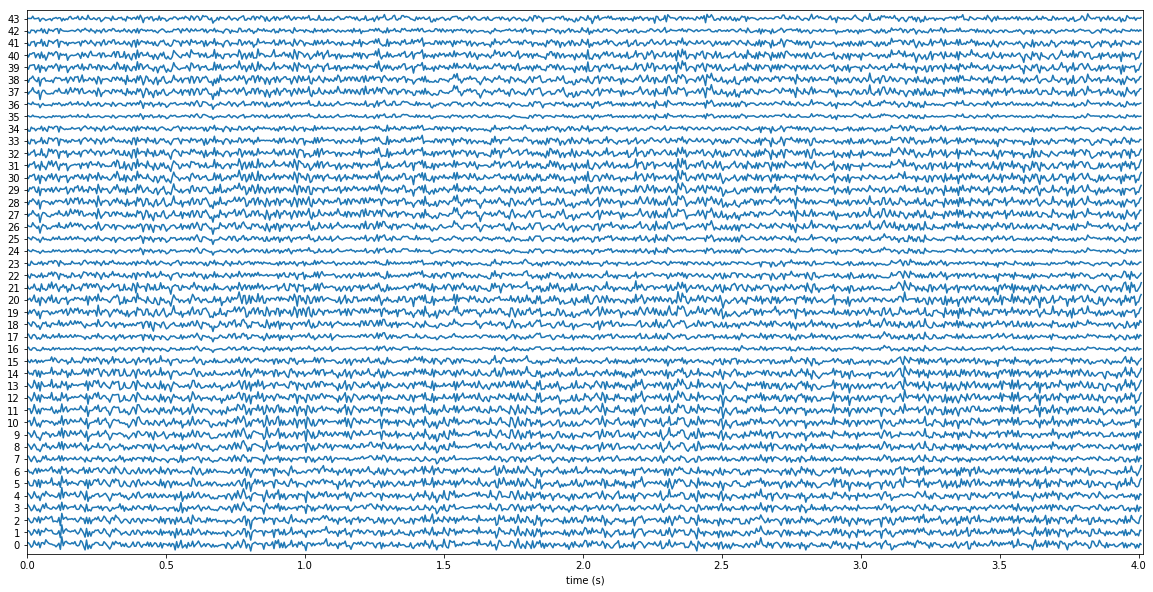

In [26]:
rcParams['figure.figsize'] = 20, 10
stacklineplot.stackplot(original[i], seconds=1004/250, ylabels=labels, yscale=1)
# stacklineplot.stackplot(original.reshape(44,1004), seconds=1004/250, ylabels=labels, yscale=3)

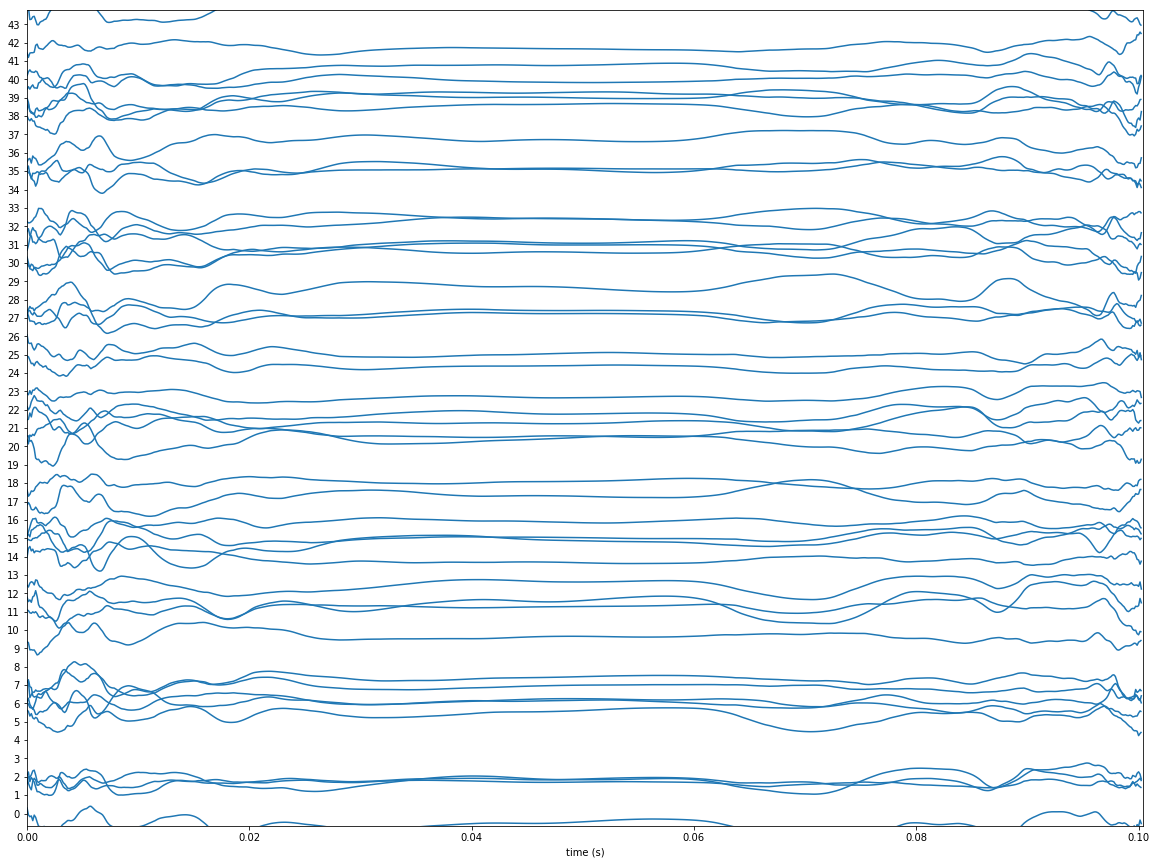

In [27]:
rcParams['figure.figsize'] = 20, 15
stacklineplot.stackplot(generated[i], seconds=1004/10000, ylabels=labels, yscale=1)
# stacklineplot.stackplot(generated.reshape(44,1004), seconds=1004/250, ylabels=labels, yscale=3)